In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
import pandas as pd
df=pd.read_csv("dataR2.csv")

In [3]:
print(df.shape)

(116, 10)


In [ ]:
print(df.dtypes) # Display data types of each column

In [4]:
print(df.columns) # Display the column names

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')


In [5]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:

# Min and Max for age
min_age = df['Age'].min()
max_age = df['Age'].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

Minimum age: 24
Maximum age: 89


In [8]:
print(df.duplicated().sum()) # Check for duplicate rows

0


In [9]:
# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Calculate and display min and max for age
min_age = df['Age'].min()
max_age = df['Age'].max()

print("The range of age values: {} - {}".format(min_age, max_age))

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Data types of each column:
Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object
The range of age values: 24 - 89
Number of duplicate rows: 0


In [10]:
# valeur anormales pour l'age
print(df[df['Age'] > 100])
print(df[df['Age'] < 0])

Empty DataFrame
Columns: [Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP.1, Classification]
Index: []
Empty DataFrame
Columns: [Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP.1, Classification]
Index: []


In [11]:


# Comptage par classe
class_counts = df['Classification'].value_counts()

# Calcul des pourcentages
class_percentages = (class_counts / len(df)) * 100

# Affichage formaté avec titres corrects
for cls, count in class_counts.items():
    pct = class_percentages[cls]
    label = "Healthy" if cls == 1 else "Sick"
    print(f"{label}: {count}-{pct:.2f}%")


Sick: 64-55.17%
Healthy: 52-44.83%


In [12]:
min_max = pd.DataFrame({
    'Min': df.min(),
    'Max': df.max()
})

print(min_max)

                      Min          Max
Age             24.000000    89.000000
BMI             18.370000    38.578759
Glucose         60.000000   201.000000
Insulin          2.432000    58.460000
HOMA             0.467409    25.050342
Leptin           4.311000    90.280000
Adiponectin      1.656020    38.040000
Resistin         3.210000    82.100000
MCP.1           45.843000  1698.440000
Classification   1.000000     2.000000


# Visualization 

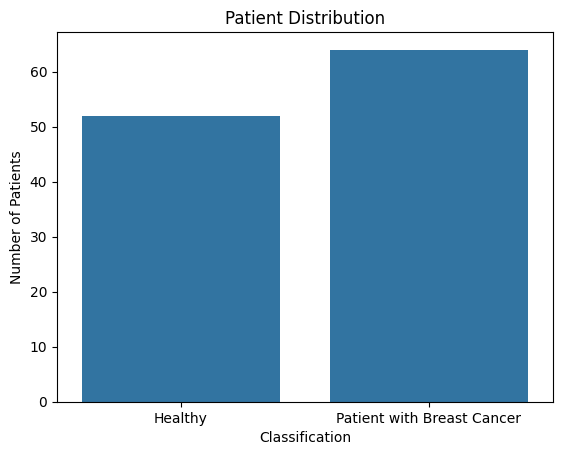

In [13]:
df['Classification'] = df['Classification'].replace({1: 'Healthy', 2: 'Patient with Breast Cancer'})

# Create the histogram
sns.countplot(x='Classification', data=df)
plt.title("Patient Distribution")
plt.ylabel("Number of Patients")
plt.show()

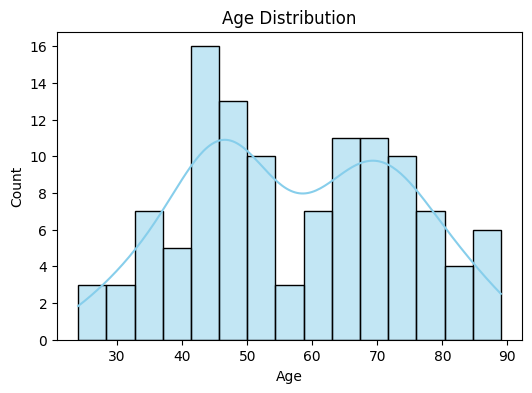

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

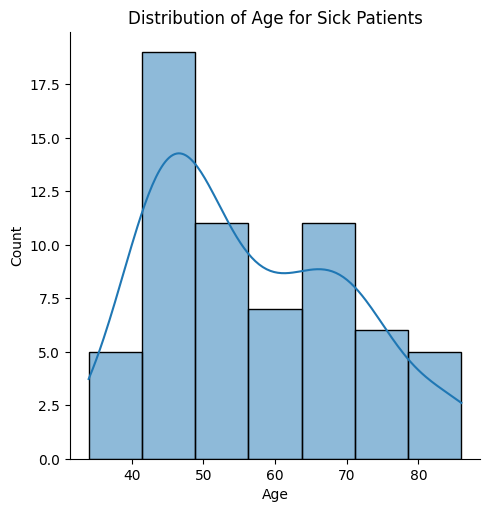

In [15]:
df=pd.read_csv("dataR2.csv")

# Filtrer les patients malades
df_sick = df[df['Classification'] == 2]  # 2 = Sick

# Colonnes à tracer
cols = ['Age']

# Tracer la distribution
for col in cols:
    sns.displot(df_sick[col], kde=True)
    plt.title(f"Distribution of {col} for Sick Patients")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


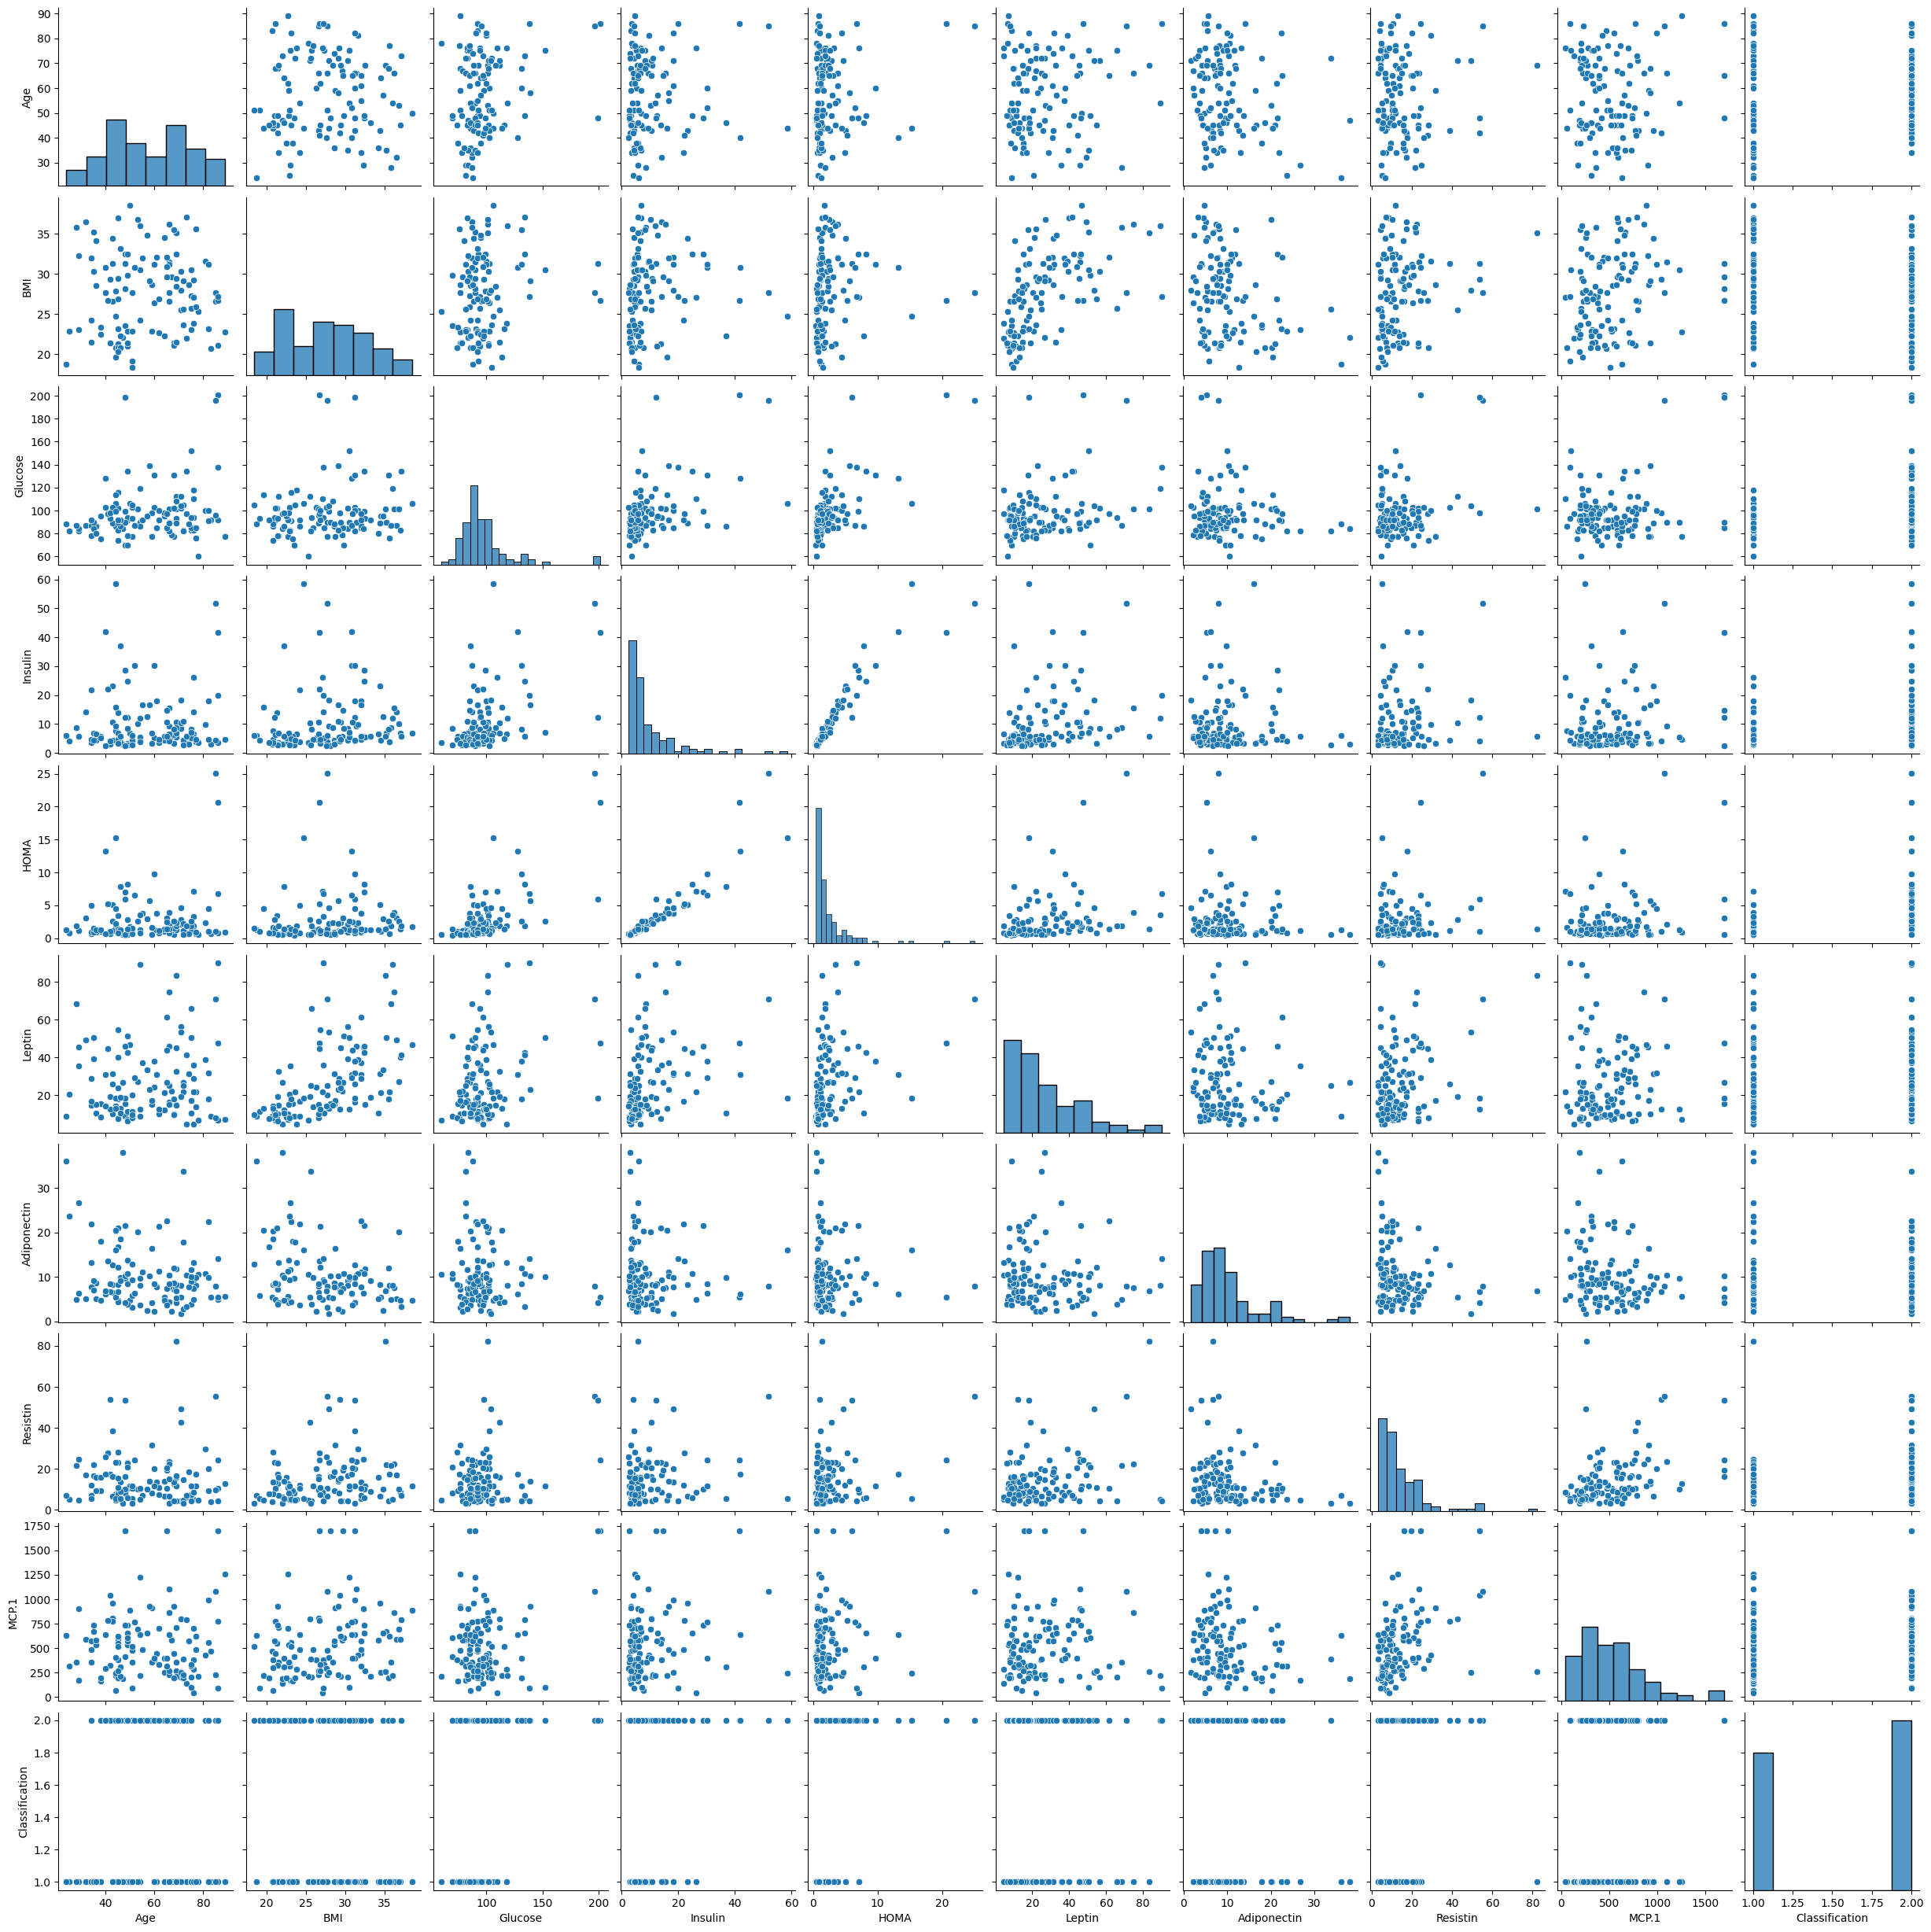

In [16]:
# Pair plot to see distributions and relationships between features
sns.pairplot(df)
plt.show()

In [17]:

# Select the age column
ages = df['Age']  # replace 'Age' with the actual column name

# Calculate statistics
mean_age = ages.mean()
median_age = ages.median()
std_age = ages.std()
min_age = ages.min()
max_age = ages.max()

# Print the results
print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation: {std_age:.2f}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")


Mean Age: 57.30
Median Age: 56.0
Standard Deviation: 16.11
Minimum Age: 24
Maximum Age: 89


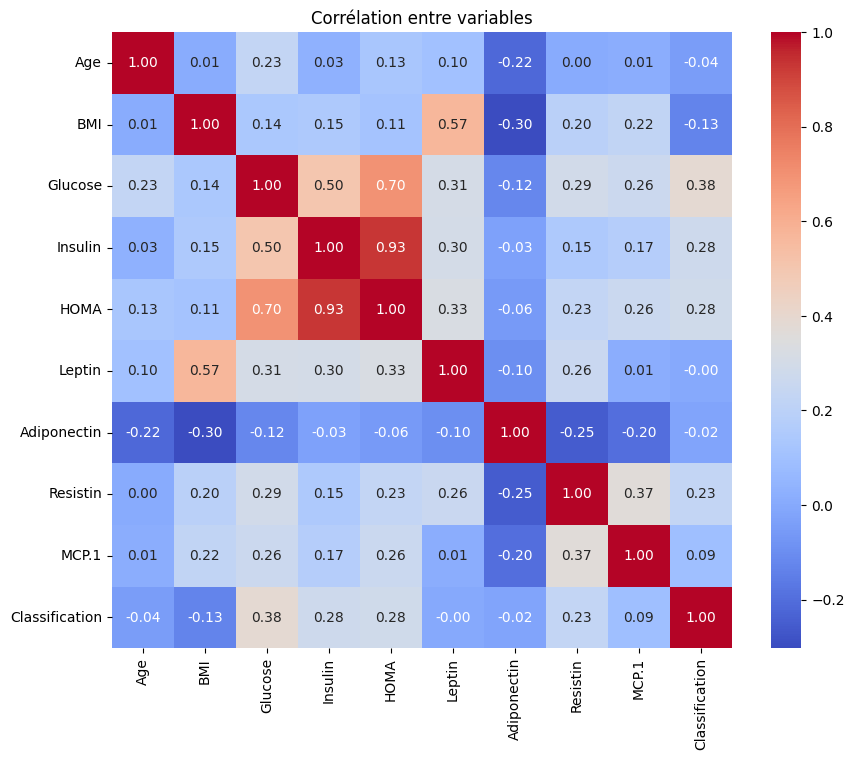

In [18]:
#coorélation:La corrélation mesure la relation linéaire entre deux variables.
# Sélectionner les colonnes numériques

numeric_cols = df.select_dtypes(include=[np.number]).columns
# Calculer la corrélation
corr = df[numeric_cols].corr()
# Tracer la heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre variables")
plt.show()
#Valeur proche de 1 ou -1 : forte corrélation positive ou négative (1:wahda tekber lo5ra tekber/-1: wahda tekber lo5ra tes8ar)
#Valeur proche de 0 : pas de corrélation (v.indépendants)

Valeurs uniques Classification: [1 2]
Class
1    64
0    52
Name: count, dtype: int64


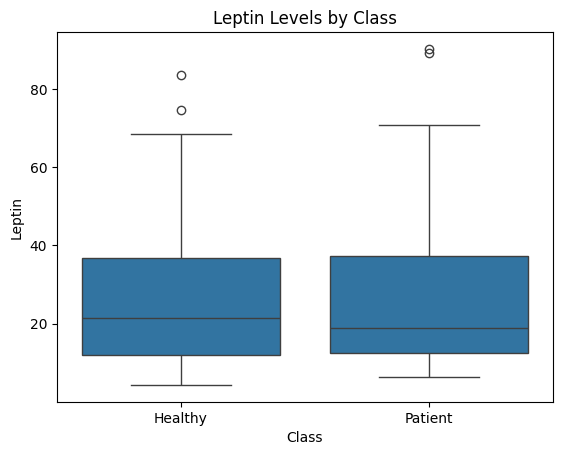

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Charger le dataset
df = pd.read_csv("dataR2.csv")

# Vérifier les valeurs uniques
print("Valeurs uniques Classification:", df['Classification'].unique())

# Créer la colonne Class correctement
# Remplacez {1:0, 2:1} par ce qui correspond à vos données
df['Class'] = df['Classification'].map({1:0, 2:1})

# Vérifier qu'il n'y a pas de NaN après mapping
print(df['Class'].value_counts())

# Supprimer les lignes où Class est NaN (mapping incorrect)
df = df.dropna(subset=['Class'])

# Boxplot
sns.boxplot(x='Class', y='Leptin', data=df)
plt.xticks([0, 1], ['Healthy', 'Patient'])
plt.title('Leptin Levels by Class')
plt.ylabel('Leptin')
plt.xlabel('Class')
plt.show()


Valeurs uniques Classification: [1 2]
Class
1    64
0    52
Name: count, dtype: int64


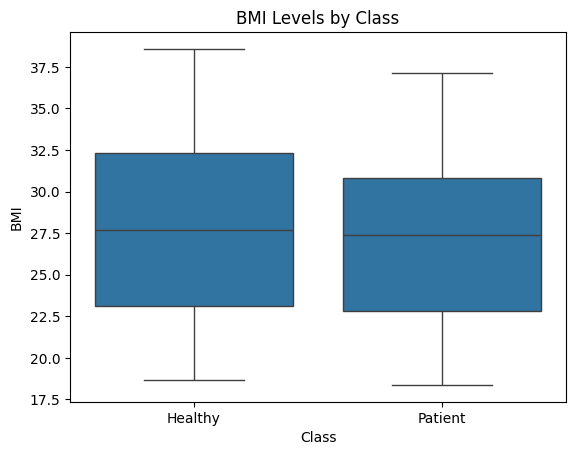

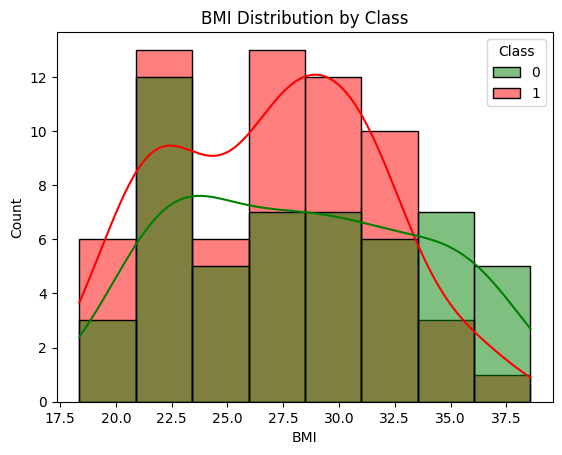

In [20]:
# Vérifier les valeurs uniques de Classification
print("Valeurs uniques Classification:", df['Classification'].unique())

# Créer la colonne Class : 0 = Healthy, 1 = Patient
df['Class'] = df['Classification'].map({1:0, 2:1})

# Supprimer les lignes où Class est NaN
df = df.dropna(subset=['Class'])

# Vérifier la répartition
print(df['Class'].value_counts())

# Boxplot BMI par classe
sns.boxplot(x='Class', y='BMI', data=df)
plt.xticks([0, 1], ['Healthy', 'Patient'])
plt.title('BMI Levels by Class')
plt.ylabel('BMI')
plt.xlabel('Class')
plt.show()

# Optionnel : Histogramme superposé
sns.histplot(df, x='BMI', hue='Class', kde=True, palette=['green', 'red'], alpha=0.5)
plt.title('BMI Distribution by Class')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [21]:
import pandas as pd
import numpy as np

# Exemple : charger le dataset
df = pd.read_csv("dataR2.csv")

# Sélectionner les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculer la corrélation
corr = df[numeric_cols].corr()

# Arrondir les valeurs à 2 décimales
corr_table = corr.round(2)

# Afficher le tableau dans la console
print("Tableau des corrélations entre les variables numériques :\n")
print(corr_table)

Tableau des corrélations entre les variables numériques :

                 Age   BMI  Glucose  Insulin  HOMA  Leptin  Adiponectin  \
Age             1.00  0.01     0.23     0.03  0.13    0.10        -0.22   
BMI             0.01  1.00     0.14     0.15  0.11    0.57        -0.30   
Glucose         0.23  0.14     1.00     0.50  0.70    0.31        -0.12   
Insulin         0.03  0.15     0.50     1.00  0.93    0.30        -0.03   
HOMA            0.13  0.11     0.70     0.93  1.00    0.33        -0.06   
Leptin          0.10  0.57     0.31     0.30  0.33    1.00        -0.10   
Adiponectin    -0.22 -0.30    -0.12    -0.03 -0.06   -0.10         1.00   
Resistin        0.00  0.20     0.29     0.15  0.23    0.26        -0.25   
MCP.1           0.01  0.22     0.26     0.17  0.26    0.01        -0.20   
Classification -0.04 -0.13     0.38     0.28  0.28   -0.00        -0.02   

                Resistin  MCP.1  Classification  
Age                 0.00   0.01           -0.04  
BMI            

# train and test

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Charger le dataset
df=pd.read_csv("dataR2.csv")


# Vérifier les valeurs uniques et NaN dans la colonne cible
print("Valeurs uniques dans Classification :", df['Classification'].unique())
print("Nombre de NaN dans Classification :", df['Classification'].isnull().sum())

# Supprimer les lignes avec NaN dans la colonne cible
df = df.dropna(subset=['Classification'])

# Encoder la cible : 1 = Healthy → 0, 2 = Breast Cancer → 1
df['Class'] = df['Classification'].map({1:0, 2:1})

# Vérifier qu'il n'y a plus de NaN
print("Nombre de NaN dans Class :", df['Class'].isnull().sum())

# Séparer X et y
X = df.drop(['Classification','Class'], axis=1)  # features
y = df['Class'] # target

# Split train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Valeurs uniques dans Classification : [1 2]
Nombre de NaN dans Classification : 0
Nombre de NaN dans Class : 0
Train shape: (92, 9) (92,)
Test shape: (24, 9) (24,)


Accuracy : 0.7083333333333334

Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24


Confusion Matrix :
 [[9 2]
 [5 8]]


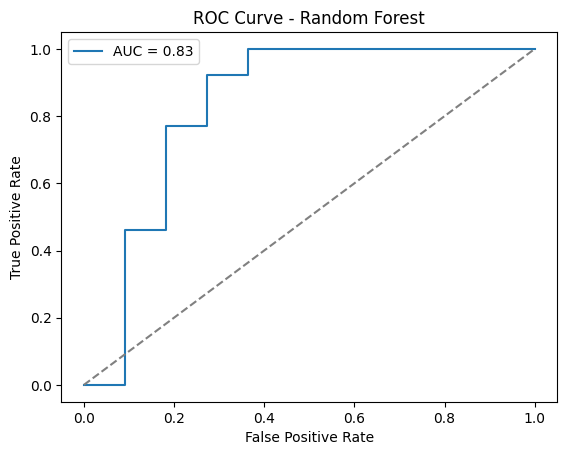

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Créer le modèle
rf = RandomForestClassifier(
    n_estimators=200,     # nombre d’arbres
    max_depth=None,      # profondeur libre (tu peux limiter)
    random_state=42,
    class_weight="balanced"  # utile si dataset déséquilibré
)

# Entraînement
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred))

# Rapport de classification
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))


# Courbe ROC
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


Accuracy (Gradient Boosting) : 0.8333333333333334

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.85      0.85      0.85        13

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24


Confusion Matrix :
 [[ 9  2]
 [ 2 11]]


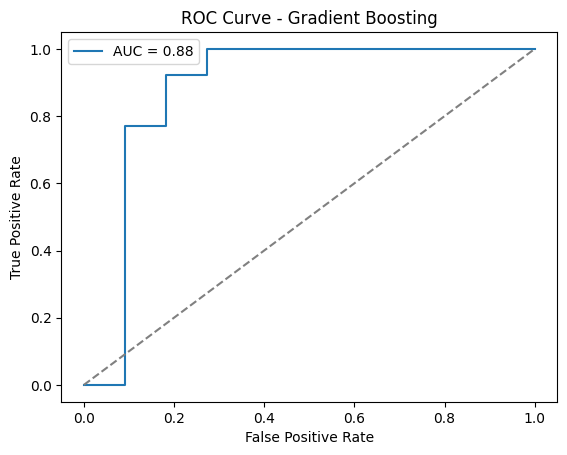

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Modèle
gb = GradientBoostingClassifier(random_state=42)

# Entraînement
gb.fit(X_train, y_train)

# Prédictions
y_pred = gb.predict(X_test)

# Accuracy
print("Accuracy (Gradient Boosting) :", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()


Accuracy (XGBoost) : 0.75

Classification Report :
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.82      0.69      0.75        13

    accuracy                           0.75        24
   macro avg       0.76      0.76      0.75        24
weighted avg       0.76      0.75      0.75        24


Confusion Matrix :
 [[9 2]
 [4 9]]


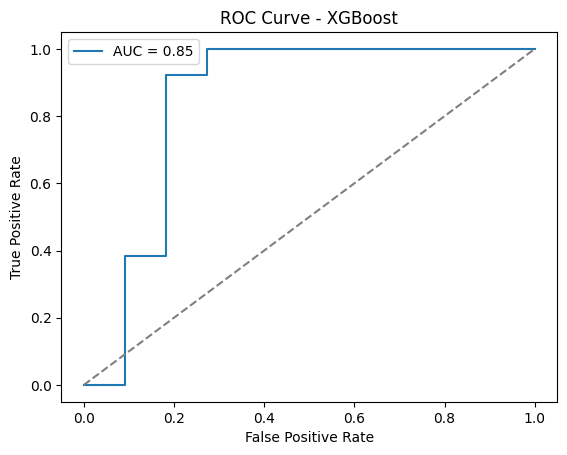

In [25]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy (XGBoost) :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


Accuracy (Decision Tree) : 0.6666666666666666

Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.73      0.62      0.67        13

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.68      0.67      0.67        24


Confusion Matrix :
 [[8 3]
 [5 8]]


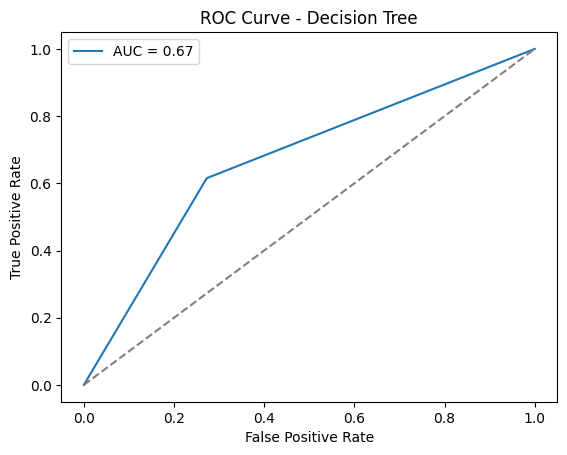

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Accuracy (Decision Tree) :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


# Standarisation

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy (KNN) : 0.8333333333333334

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.91      0.77      0.83        13

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.84      0.83      0.83        24


Confusion Matrix :
 [[10  1]
 [ 3 10]]


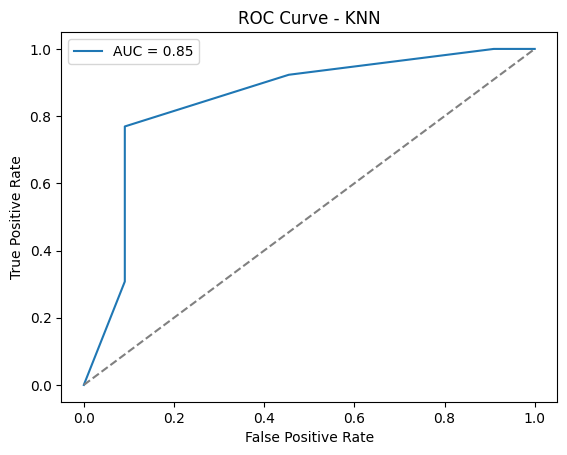

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entraînement
knn.fit(X_train_scaled, y_train)

# Prédictions
y_pred = knn.predict(X_test_scaled)

print("Accuracy (KNN) :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()


Accuracy (SVM) : 0.7083333333333334

Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24


Confusion Matrix :
 [[9 2]
 [5 8]]


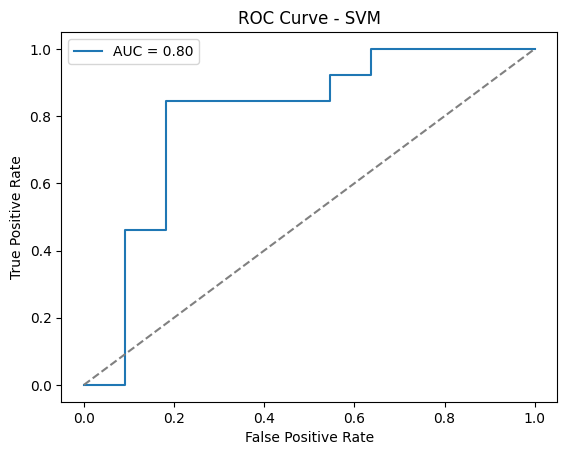

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("Accuracy (SVM) :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = svm.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


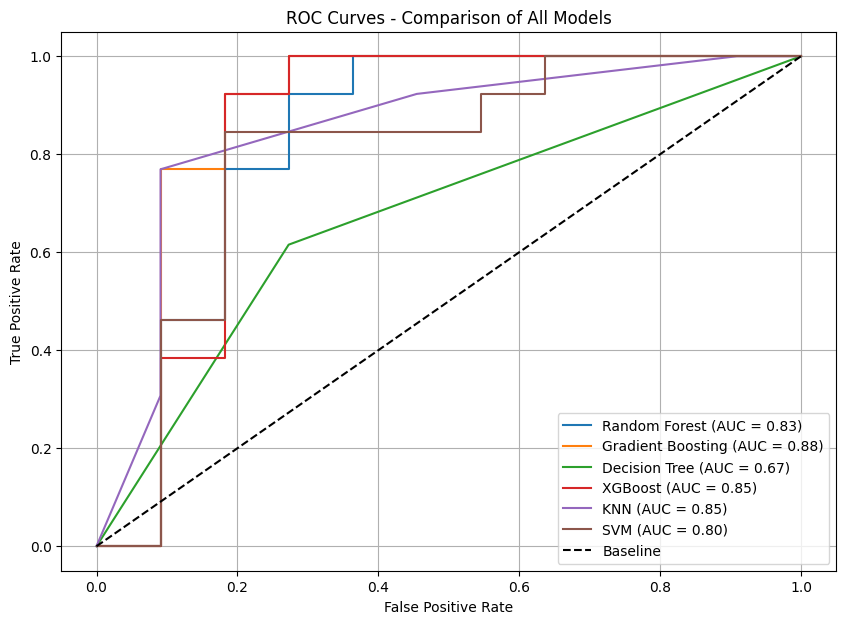

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

# --- Random Forest ---
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")

# --- Gradient Boosting ---
y_prob = gb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")

# --- Decision Tree ---
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")

# --- XGBoost ---
y_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")

# --- KNN ---
y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")

# --- SVM ---
y_prob = svm.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")

# --- Diagonale référence ---
plt.plot([0,1], [0,1], 'k--', label="Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Comparison of All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [31]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Fonction utilitaire pour obtenir metrics
def get_metrics(model, X, name):
    y_pred = model.predict(X)

    # Pour AUC : probability si possible, sinon decision_function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)[:, 1]
    else:
        y_prob = model.decision_function(X)

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

results = []

# Models without scaling
results.append(get_metrics(rf, X_test, "Random Forest"))
results.append(get_metrics(gb, X_test, "Gradient Boosting"))
results.append(get_metrics(dt, X_test, "Decision Tree"))
results.append(get_metrics(xgb, X_test, "XGBoost"))

# Models with scaling
results.append(get_metrics(knn, X_test_scaled, "KNN"))
results.append(get_metrics(svm, X_test_scaled, "SVM"))

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Afficher le tableau
print(df_results)


               Model  Accuracy    Recall  F1-score       AUC
0      Random Forest  0.708333  0.615385  0.695652  0.832168
1  Gradient Boosting  0.833333  0.846154  0.846154  0.881119
2      Decision Tree  0.666667  0.615385  0.666667  0.671329
3            XGBoost  0.750000  0.692308  0.750000  0.846154
4                KNN  0.833333  0.769231  0.833333  0.849650
5                SVM  0.708333  0.615385  0.695652  0.797203


# with cross validation

Cross-validation scores: [0.79166667 0.69565217 0.52173913 0.7826087  0.73913043]
Mean CV accuracy: 0.7061594202898551
Test Accuracy: 0.7083333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24


Confusion Matrix:
 [[9 2]
 [5 8]]


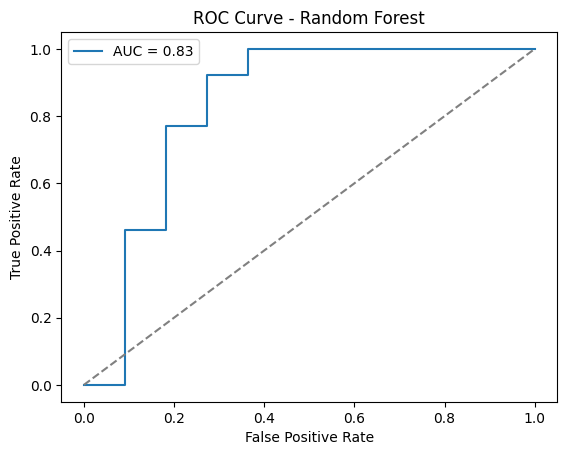

In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Random Forest model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train on train set
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Accuracy and classification
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC curve
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


Cross-validation scores: [0.79166667 0.60869565 0.56521739 0.86956522 0.7826087 ]
Mean CV accuracy: 0.7235507246376811
Test Accuracy (Gradient Boosting): 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.85      0.85      0.85        13

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24


Confusion Matrix:
 [[ 9  2]
 [ 2 11]]


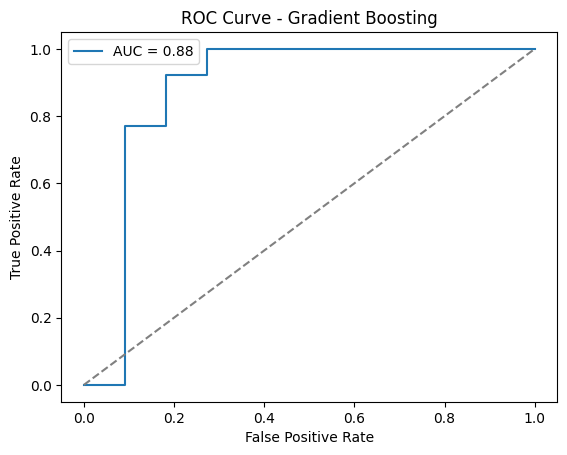

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Modèle Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gb, X, y, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Entraînement sur train set
gb.fit(X_train, y_train)

# Prédictions
y_pred = gb.predict(X_test)

# Accuracy et classification
print("Test Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()


Cross-validation scores: [0.79166667 0.65217391 0.52173913 0.86956522 0.82608696]
Mean CV accuracy: 0.7322463768115942
Test Accuracy (XGBoost): 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.82      0.69      0.75        13

    accuracy                           0.75        24
   macro avg       0.76      0.76      0.75        24
weighted avg       0.76      0.75      0.75        24


Confusion Matrix:
 [[9 2]
 [4 9]]


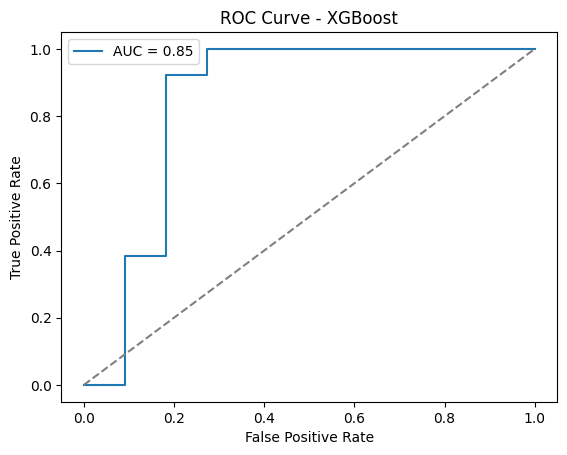

In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Modèle XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X, y, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Entraînement sur train set
xgb.fit(X_train, y_train)

# Prédictions
y_pred = xgb.predict(X_test)

# Accuracy et classification
print("Test Accuracy (XGBoost):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


Cross-validation scores: [0.75       0.56521739 0.47826087 0.65217391 0.73913043]
Mean CV accuracy: 0.6369565217391303
Test Accuracy (Decision Tree): 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.73      0.62      0.67        13

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.68      0.67      0.67        24


Confusion Matrix:
 [[8 3]
 [5 8]]


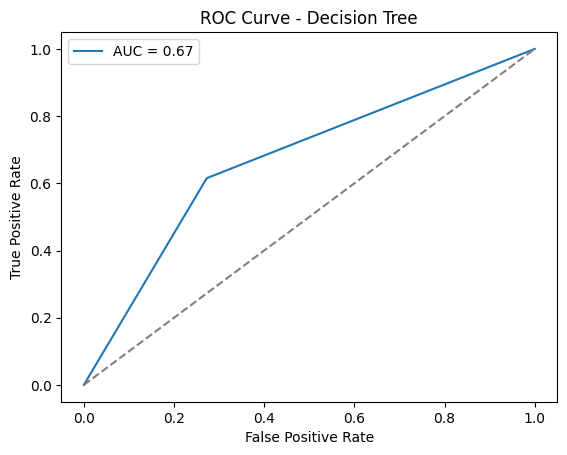

In [35]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Modèle Decision Tree
dt = DecisionTreeClassifier(
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Entraînement sur train set
dt.fit(X_train, y_train)

# Prédictions
y_pred = dt.predict(X_test)

# Accuracy et classification
print("Test Accuracy (Decision Tree):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Cross-validation scores: [0.78947368 0.73684211 0.66666667 0.72222222 0.72222222]
Mean CV accuracy: 0.7274853801169591
Test Accuracy (KNN): 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.91      0.77      0.83        13

    accuracy                           0.83        24
   macro avg       0.84      0.84      0.83        24
weighted avg       0.84      0.83      0.83        24


Confusion Matrix:
 [[10  1]
 [ 3 10]]


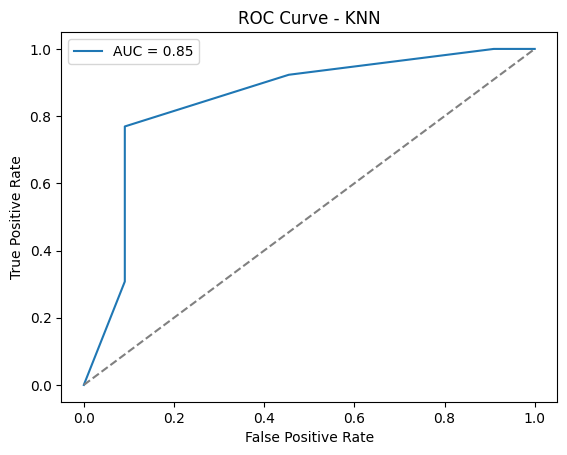

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train on full train set
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Accuracy and classification report
print("Test Accuracy (KNN):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()


Cross-validation scores: [0.73684211 0.73684211 0.66666667 0.72222222 0.77777778]
Mean CV accuracy: 0.7280701754385965
Test Accuracy (SVM): 0.7083333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24


Confusion Matrix:
 [[9 2]
 [5 8]]


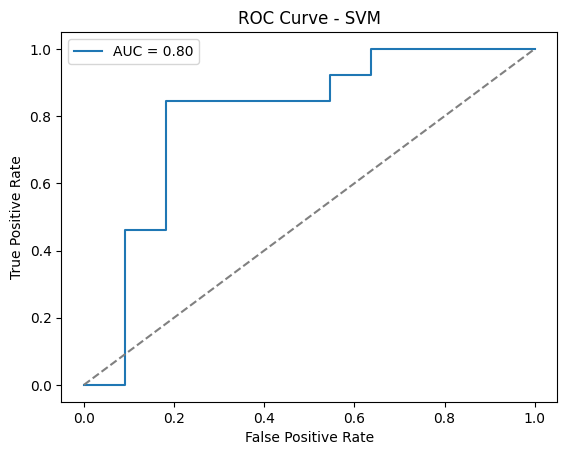

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train on full train set
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm.predict(X_test_scaled)

# Accuracy and classification report
print("Test Accuracy (SVM):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
y_prob = svm.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


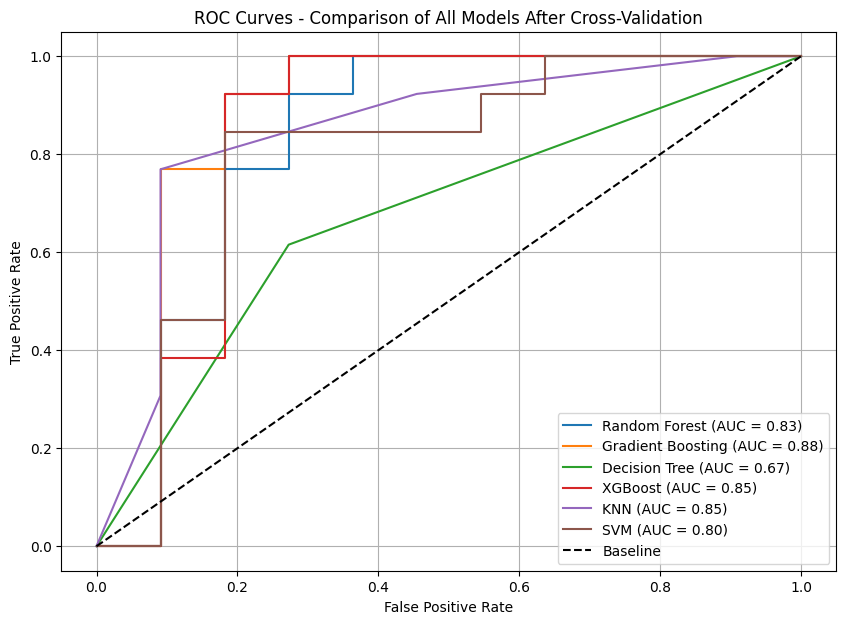

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

# --- Random Forest ---
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")

# --- Gradient Boosting ---
y_prob = gb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {roc_auc:.2f})")

# --- Decision Tree ---
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")

# --- XGBoost ---
y_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")

# --- KNN ---
y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")

# --- SVM ---
y_prob = svm.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")

# --- Diagonale référence ---
plt.plot([0,1], [0,1], 'k--', label="Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Comparison of All Models After Cross-Validation")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [40]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Fonction utilitaire pour obtenir metrics
def get_metrics(model, X, name):
    y_pred = model.predict(X)

    # Pour AUC : probability si possible, sinon decision_function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)[:, 1]
    else:
        y_prob = model.decision_function(X)

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

results = []

# Models without scaling
results.append(get_metrics(rf, X_test, "Random Forest"))
results.append(get_metrics(gb, X_test, "Gradient Boosting"))
results.append(get_metrics(dt, X_test, "Decision Tree"))
results.append(get_metrics(xgb, X_test, "XGBoost"))

# Models with scaling
results.append(get_metrics(knn, X_test_scaled, "KNN"))
results.append(get_metrics(svm, X_test_scaled, "SVM"))

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Afficher le tableau
print(df_results)


               Model  Accuracy    Recall  F1-score       AUC
0      Random Forest  0.708333  0.615385  0.695652  0.832168
1  Gradient Boosting  0.833333  0.846154  0.846154  0.881119
2      Decision Tree  0.666667  0.615385  0.666667  0.671329
3            XGBoost  0.750000  0.692308  0.750000  0.846154
4                KNN  0.833333  0.769231  0.833333  0.849650
5                SVM  0.708333  0.615385  0.695652  0.797203


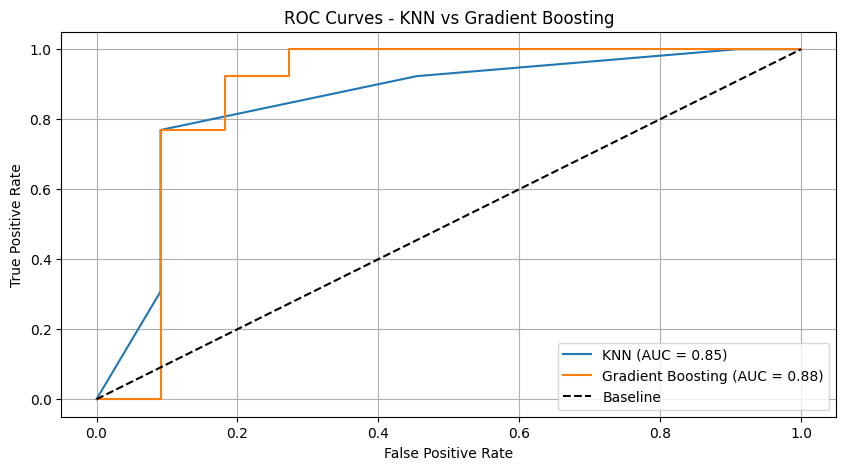

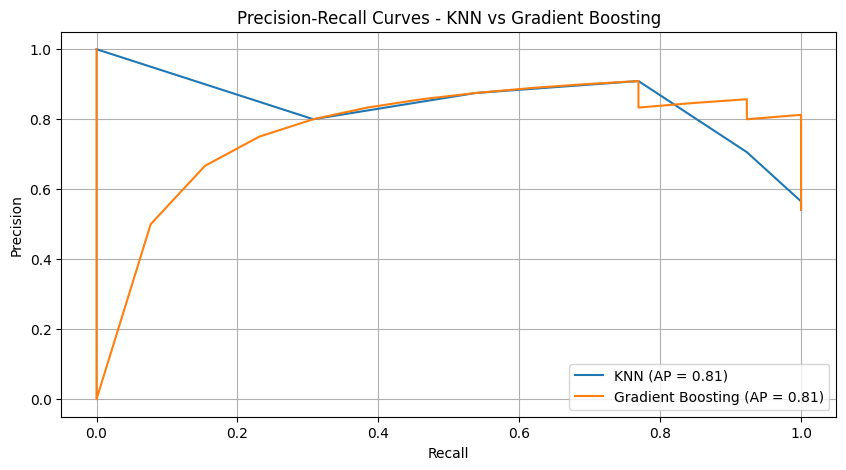

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# --- KNN ---
y_prob_knn = knn.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)
ap_knn = average_precision_score(y_test, y_prob_knn)

# --- Gradient Boosting ---
y_prob_gb = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_prob_gb)
ap_gb = average_precision_score(y_test, y_prob_gb)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - KNN vs Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision-Recall curves
plt.figure(figsize=(10, 5))
plt.plot(recall_knn, precision_knn, label=f"KNN (AP = {ap_knn:.2f})")
plt.plot(recall_gb, precision_gb, label=f"Gradient Boosting (AP = {ap_gb:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves - KNN vs Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()
